In [ ]:
#Dependencias
import pandas as pd #Esto es para manipular el archivo
import matplotlib.pyplot as plt  #Para graficos


In [ ]:
#Gloabales
abreviados = {'Precio mercado SPOT Diario ESP': 'ESP',
              'Precio mercado SPOT Diario FRA': 'FRA',
              'Precio mercado SPOT Diario POR': 'POR'}

###Leo el Archivo

In [ ]:
#Leo el archivo
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spain_energy_market.csv')

## 1. Exploracion del DataSet

In [ ]:
#Head
df.head()

,datetime,id,name,geoid,geoname,value
0,2014-01-01 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,25.280833
1,2014-01-02 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,39.924167
2,2014-01-03 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,4.992083
3,2014-01-04 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,4.091667
4,2014-01-05 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,13.587500


In [ ]:
#Descripcion general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  40212 non-null  object 
 1   id        40212 non-null  int64  
 2   name      34734 non-null  object 
 3   geoid     10956 non-null  float64
 4   geoname   10956 non-null  object 
 5   value     40212 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.8+ MB


A partir de esta primera observacion puedo encontrar varias cosas sobre el data set y sus columnas actuales:


*   Tiene 6 columnas.
*   Son 40212 filas
*   Creo que la columna mas relevante es la columna (name). Ahora mismo alli veo el valor de UNA de las variables descritas en el dataset. (PENDIENTE) Confirmar si estan en esta columna las demas variables descritas.
*   Esta ordenada aparentemente por fechas.


*   El formato de las fechas parece ir en intervalos de un dia.
*   El reporte se toma a las 23:00 cada dia.


*   La columna ID supongo que es ID de esa variable. (PENDEIENTE) ver otras variables y observar si tienen otro ID?
*   La columna (geoid) probablemente es el ID de la zona en la cual se esta haciendo el reporte. (PENDIENTE) Este id varia por pais o por zona?


*   La columna (geoname) probablemente esta directamente relacionadad con la columna (geoid). (Pendiente), estan realmente relacionadas las columnas?
*   La ultima columna es la columna value, es un numero sin unidad. (PENDIENTE) verificar como cambia este valor con  las diferentes lineas.











####Verifico cuantas variables hay descritas en la columna (mane)
Esto me permitira entender mejor si efectivamente cada una de las variables descritas en el dataset estan presentes y el orden.

In [ ]:
#Verifico los valores presentes en la columna name
df['name'].unique()


array(['Precio mercado SPOT Diario ESP', 'Precio mercado SPOT Diario FRA',
       'Precio mercado SPOT Diario POR',
       'Energía asignada en Mercado SPOT Diario España',
       'Energía asignada en Mercado SPOT Diario Francia', nan,
       'Rentas de congestión mecanismos implícitos diario Francia exportación',
       'Rentas de congestión mecanismos implícitos diario Portugal exportación',
       'Rentas de congestión mecanismos implícitos diario Francia importación',
       'Rentas de congestión mecanismos implícitos diario Portugal importación',
       'Demanda real', 'Demanda programada PBF total',
       'Generación programada PBF total',
       'Generación programada PBF Eólica',
       'Generación programada PBF Ciclo combinado',
       'Generación programada PBF Carbón',
       'Generación programada PBF Nuclear',
       'Generación programada PBF Gas Natural Cogeneración',
       'Generación programada PBF UGH + no UGH',
       'Generación programada PBF Solar fotovoltaica'

Veo que efectivamente las variables descritas estan todas acumuladas en la columna (name), eso quiere decir que este DataSet esta en formato largo "Long Format".

Se observa tambien la presencia de 'nan' (LIMPIEZA)

In [ ]:
#Cuento la cantidad de Variables en la columna (name)
df['name'].unique().size

print(f"La cantidad de variables es {len(df['name'].unique())}")


La cantidad de variables es 21


####Verifico la variable ID para intentar determinar la cantidad de ID disponibles y con cual es compatible.

In [ ]:
#Diferentes ID presentes en la variable
df['id'].unique()

array([  600,   602,  1334,  1118,  1120,  1117,  1119,  1293, 10141,
       10258, 10073,     9, 10167,     4,    17, 10064,    14,     3])

In [ ]:
#Cuento la cantidad de IDs
df['id'].unique().size

18

Hay 18 IDs pero 20 variables, el numero es similar, es probable que algunas variables compartan el mismo ID. (PENDIENTE) por que hay mas variables que IDs?

#####Estan realmente los IDs y variables relacionados?


In [ ]:
#IDs y varibales
pd.set_option('display.max_colwidth', None)  #para que no corte el texto

df.groupby('id')['name'].unique()

,name
id,
3,[Generación programada PBF Turbinación bombeo]
4,[Generación programada PBF Nuclear]
9,[Generación programada PBF Ciclo combinado]
14,[Generación programada PBF Solar fotovoltaica]
17,[Generación programada PBF Gas Natural Cogeneración]
600,"[Precio mercado SPOT Diario ESP, Precio mercado SPOT Diario FRA, Precio mercado SPOT Diario POR, nan]"
602,[Energía asignada en Mercado SPOT Diario España]
1117,[Rentas de congestión mecanismos implícitos diario Francia importación]
1118,[Rentas de congestión mecanismos implícitos diario Francia exportación]


Si, se confirma que estan relacionadas; la columna (Id) y la columna (name). La diferencia en cantidad se explica porque el ID 600 contiene a las 3 variables de precio.

Este ID 600 tambien tiene valores en 'nan'. Eso tendre que ver mas a profundidad despues.

####esta ordenado por fechas?





<Axes: >

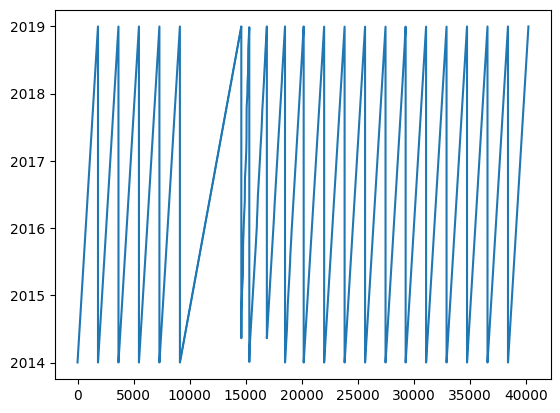

In [ ]:
#Verifico si el Df esta ordenado por fechas
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime'].plot()

Si, efectivamente se puede observar que esta ordenadi de manera cronologica, cada pico corresponde con el fin de una variable.

#### Relacion de geoid con geoname

In [ ]:
#Cuento ambas columnas por categorias
print(f'La cantidad de categorias en geoid es: {len(df['geoid'].unique())}')
print(f'La cantidad de categorias en geoname es: {len(df['geoname'].unique())}')


La cantidad de categorias en geoid es: 4
La cantidad de categorias en geoname es: 4


Justamente coinciden en numero estas dos columnas. Las agrupare para ver la correspondencia.

In [ ]:
# Ahora agrupo ambas variables
df.groupby('geoid')['geoname'].unique()

,geoname
geoid,
1.0,[Portugal]
2.0,[Francia]
3.0,[España]


Corresponde perfectamnete por paises pero veo un problema, no figuran 4 lugares sino tres. Lo verifico ahora.

In [ ]:
df['geoid'].unique()

array([ 3.,  2.,  1., nan])

In [ ]:
df['geoname'].unique()

array(['España', 'Francia', 'Portugal', nan], dtype=object)

Se observan datos faltantes tambien aqui, lo confirmo con la presencia de 'nan' en ambas categorias. (LIMPIEZA)

#### Conclusión Sección 1

Los valores de cada una de las columnas es la siguiente:


*   datetime: Esta en formato YYYY-MM-DD HH:MM:SS, y esta ordenado cronologicamente por cada varianble.

*   id: corresponde al ID por cada variable, por suerte no hay nan aqui.

*   name: corresponde a cada variable de las descritas en  la descripcion del dataset, esta ordenado en formato largo.
*   geoid: corresponde a un id unico para cada pais.


*   geoname: Corresponde al pais y esta conectado directamnete con el geoid.


*   value: Corresponde al valor de cada una de las variables, este valor cambia con cada variable.



#### Acciones a tomar

Primeramente hare una transformacion al dataset a un formato ancho. Wide Format

## 2. Transformacion a WideFormat

In [ ]:
# Tranformo el DF a formato ancho

#df_wide = df.pivot(index='datetime', columns='name', values='value')

No funciona de esta manera, parece que hay diplicados

####2.1 Busco Diplicados

In [ ]:
# Duplicados
duplicados = df[df.duplicated(subset=['datetime', 'name'], keep=False)]

In [ ]:
duplicados

,datetime,id,name,geoid,geoname,value
9130,2014-01-01 23:00:00,600,NaN,1.0,Portugal,25.043750
9131,2014-01-01 23:00:00,600,NaN,2.0,Francia,28.711250
9132,2014-01-01 23:00:00,600,NaN,3.0,España,25.280833
9133,2014-01-02 23:00:00,600,NaN,1.0,Portugal,38.980417
9134,2014-01-02 23:00:00,600,NaN,2.0,Francia,28.397500
...,...,...,...,...,...,...
14603,2018-12-30 23:00:00,600,NaN,2.0,Francia,55.321667
14604,2018-12-30 23:00:00,600,NaN,3.0,España,61.795000
14605,2018-12-31 23:00:00,600,NaN,1.0,Portugal,63.454583
14606,2018-12-31 23:00:00,600,NaN,2.0,Francia,41.242500


Los duplicados estan presentes segun lo que puedo observar en columnas que tienen codigo 600, es decir las variables de precio y la repeticion se da por estar repetidamente nan, igualmente se podrian utilizar entendiendo que cada una aun tiene geoid y geoname.



#####Paso a buscar realmente si todos los duplicados corresponden al 600

In [ ]:
#Codigo 600 para duplicados?
duplicados['id'].unique()

array([600])

Si, todos tienen el mismo codigo. Quiere decir que el 100% de los casos corresponde a id 600, precios entonces.

##### Paso a buscar si hay algun caso dentro de los duplicados donde geoid este nulo o geoname este nulo

In [ ]:
#Valores en geoid en Duplicados
duplicados['geoid'].unique()

array([1., 2., 3.])

Buena noticia, no hay NaN aqui.

In [ ]:
#Valores en geoname en Duplicados
duplicados['geoname'].unique()


array(['Portugal', 'Francia', 'España'], dtype=object)

Aqui tambien todos los valores son validos, quiere decir que puedo usar tanto geoname como geoid para los valores que nan en name

####2.2 Conclusiones de encontrar Duplicados

Se puede completar cada uno de las filas con name: nan porque tengo los demas datos y ya en base a las correlaciones hechas en la seccion previa se puede hacer enlace de cada geoid e id con la variable correspondiente.

Adicionalmente se confirmo que todos los duplicados corresponden al id 600.

####2.3 Acciones despues de encontrar duplicados,

Completar cada uno de las 5478 filas, siguiendo el siguiente patron:
*  para geoid 1.0 Precio mercado SPOT Diario POR
*  para geoid 2.0 Precio mercado SPOT Diario FRA
*  para geoid 3.0 Precio mercado SPOT Diario ESP




###3. Completo el df original

In [ ]:
# Hago primero una copia
df_completado = df.copy()


In [ ]:
# Lo completo
df_completado.loc[(df_completado['name'].isna()) & (df_completado['geoid'] == 1.0), 'name'] = 'Precio mercado SPOT Diario POR'

In [ ]:
#Verifico si funciono
df_completado.loc[[9130, 9133, 14605]]

,datetime,id,name,geoid,geoname,value
9130,2014-01-01 23:00:00,600,Precio mercado SPOT Diario POR,1.0,Portugal,25.043750
9133,2014-01-02 23:00:00,600,Precio mercado SPOT Diario POR,1.0,Portugal,38.980417
14605,2018-12-31 23:00:00,600,Precio mercado SPOT Diario POR,1.0,Portugal,63.454583


Si, estan completadas ahora, paso con el resto de casos.

In [ ]:
#Caso de España y Caso de Francia
df_completado.loc[(df_completado['name'].isna()) & (df_completado['geoid'] == 2.0), 'name'] = 'Precio mercado SPOT Diario FRA'

df_completado.loc[(df_completado['name'].isna()) & (df_completado['geoid'] == 3.0), 'name'] = 'Precio mercado SPOT Diario ESP'

In [ ]:
#Compruebo
df_completado.loc[[9131, 9132, 9134, 14603, 14604, 14606, 14607]]

,datetime,id,name,geoid,geoname,value
9131,2014-01-01 23:00:00,600,Precio mercado SPOT Diario FRA,2.0,Francia,28.711250
9132,2014-01-01 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,25.280833
9134,2014-01-02 23:00:00,600,Precio mercado SPOT Diario FRA,2.0,Francia,28.397500
14603,2018-12-30 23:00:00,600,Precio mercado SPOT Diario FRA,2.0,Francia,55.321667
14604,2018-12-30 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,61.795000
14606,2018-12-31 23:00:00,600,Precio mercado SPOT Diario FRA,2.0,Francia,41.242500
14607,2018-12-31 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,63.454583


In [ ]:
#Duplicados
duplicados = df_completado[df_completado.duplicated(subset=['datetime', 'name'], keep=False)]
display(duplicados)

,datetime,id,name,geoid,geoname,value
0,2014-01-01 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,25.280833
1,2014-01-02 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,39.924167
2,2014-01-03 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,4.992083
3,2014-01-04 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,4.091667
4,2014-01-05 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,13.587500
...,...,...,...,...,...,...
14603,2018-12-30 23:00:00,600,Precio mercado SPOT Diario FRA,2.0,Francia,55.321667
14604,2018-12-30 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,61.795000
14605,2018-12-31 23:00:00,600,Precio mercado SPOT Diario POR,1.0,Portugal,63.454583
14606,2018-12-31 23:00:00,600,Precio mercado SPOT Diario FRA,2.0,Francia,41.242500


Aparecen nuevamnete duplicados, no tiene mucho sentido.

In [ ]:
df_completado['name'].isna().sum()

np.int64(0)

Verifico que efectivamente se completaron porque el resultado de los nulos ahora es 0

In [ ]:
duplicados.groupby(['datetime', 'name']).size()

datetime             name                          
2014-01-01 23:00:00  Precio mercado SPOT Diario ESP    2
                     Precio mercado SPOT Diario FRA    2
                     Precio mercado SPOT Diario POR    2
2014-01-02 23:00:00  Precio mercado SPOT Diario ESP    2
                     Precio mercado SPOT Diario FRA    2
                                                      ..
2018-12-30 23:00:00  Precio mercado SPOT Diario FRA    2
                     Precio mercado SPOT Diario POR    2
2018-12-31 23:00:00  Precio mercado SPOT Diario ESP    2
                     Precio mercado SPOT Diario FRA    2
                     Precio mercado SPOT Diario POR    2
Length: 5478, dtype: int64

Sin embargo aqui se nota que hay duplicados que parecieran corresponder con el doble de los 5478 completados originalmente. Quiere decir esto que probablemente esos valores que habian sido completados o simplemente los NaN correspondian a errores de registro.

####3.1 Conclusion


No era necesario completar los datos que complete, pero sin haberlo hecho era dificil saber que cada uno de esos NaN tenian un gemelo.

####3.2 Accion
Tomar el df original y eliminar los NaN de name

In [ ]:
#Elimino y creo un nuevo df
df_limpio = df.dropna(subset=['name'])

In [ ]:
#Compruebo
duplicados = df_limpio[df_limpio.duplicated(subset=['datetime', 'name'])]
display(duplicados)

print(len(duplicados))

,datetime,id,name,geoid,geoname,value


0


Funciono, ahora si tengo limpio. Intentare ahora el pivot()

## 4. Transformacion a WideFormat

In [ ]:
#Aplico Pivot
df_wide = df_limpio.pivot(index='datetime', columns= 'name', values='value')

In [ ]:
df_wide.head()

name,Demanda programada PBF total,Demanda real,Energía asignada en Mercado SPOT Diario España,Energía asignada en Mercado SPOT Diario Francia,Generación programada PBF Carbón,Generación programada PBF Ciclo combinado,Generación programada PBF Eólica,Generación programada PBF Gas Natural Cogeneración,Generación programada PBF Nuclear,Generación programada PBF Solar fotovoltaica,Generación programada PBF Turbinación bombeo,Generación programada PBF UGH + no UGH,Generación programada PBF total,Precio mercado SPOT Diario ESP,Precio mercado SPOT Diario FRA,Precio mercado SPOT Diario POR,Rentas de congestión mecanismos implícitos diario Francia exportación,Rentas de congestión mecanismos implícitos diario Francia importación,Rentas de congestión mecanismos implícitos diario Portugal exportación,Rentas de congestión mecanismos implícitos diario Portugal importación
datetime,,,,,,,,,,,,,,,,,,,,
2014-01-01 23:00:00,620107.7,28191.597222,566081.9,171917.3,2498.7,4497.5,277443.9,75993.1,144654.6,7027.3,15226.2,87564.8,642771.8,25.280833,28.71125,25.043750,NaN,NaN,NaN,10811.0
2014-01-02 23:00:00,659865.2,28465.180556,586355.6,164386.5,19741.4,14541.1,237323.1,83437.4,146177.8,12817.8,21979.8,94432.6,658078.5,39.924167,28.39750,38.980417,NaN,NaN,NaN,43035.0
2014-01-03 23:00:00,632536.8,26860.493056,609612.9,166611.2,1288.0,3555.6,329506.6,65023.9,145055.3,12532.5,3192.2,92236.2,680564.6,4.992083,12.99750,4.683750,NaN,NaN,NaN,14060.0
2014-01-04 23:00:00,610251.7,25333.597222,605090.0,156271.4,NaN,2310.2,292138.3,64036.6,145200.2,14108.3,4540.8,94189.3,644494.7,4.091667,23.08500,4.091667,NaN,NaN,0.0,0.0
2014-01-05 23:00:00,572534.1,23905.541667,531020.2,170611.0,2687.0,6297.0,223942.0,74151.3,135624.0,14555.6,5165.4,103851.1,598661.4,13.587500,31.29000,12.762500,NaN,NaN,NaN,37620.0


Aparentemente esta bien el df_wide. Este puedo utilizar para los analisis.

## 5. Analisis

In [ ]:
#Describo el nuevo df

df_wide.describe()

name,Demanda programada PBF total,Demanda real,Energía asignada en Mercado SPOT Diario España,Energía asignada en Mercado SPOT Diario Francia,Generación programada PBF Carbón,Generación programada PBF Ciclo combinado,Generación programada PBF Eólica,Generación programada PBF Gas Natural Cogeneración,Generación programada PBF Nuclear,Generación programada PBF Solar fotovoltaica,Generación programada PBF Turbinación bombeo,Generación programada PBF UGH + no UGH,Generación programada PBF total,Precio mercado SPOT Diario ESP,Precio mercado SPOT Diario FRA,Precio mercado SPOT Diario POR,Rentas de congestión mecanismos implícitos diario Francia exportación,Rentas de congestión mecanismos implícitos diario Francia importación,Rentas de congestión mecanismos implícitos diario Portugal exportación,Rentas de congestión mecanismos implícitos diario Portugal importación
count,1825.000000,1825.000000,1826.000000,1826.000000,1823.000000,1793.000000,1825.000000,1826.000000,1825.000000,1826.000000,1824.000000,1826.000000,1825.000000,1826.000000,1826.000000,1826.000000,7.120000e+02,1.619000e+03,1566.000000,1664.000000
mean,662011.822521,28506.322147,513097.669496,276274.704491,94283.964399,33292.798885,142036.368110,68037.737185,150840.289863,21561.278368,9383.232566,90268.082530,648991.317370,48.356157,41.015079,48.354966,7.088749e+04,1.609616e+05,5601.742356,8420.242488
std,62654.745303,2747.797280,65982.124373,62816.955122,66814.086348,29995.740651,71658.603519,6809.811215,19582.034115,6809.132426,6279.570526,42988.826981,69506.158773,13.760859,15.461417,13.813673,2.457533e+05,2.523879e+05,28450.128789,37314.079800
min,493489.300000,21196.722222,325337.700000,133090.200000,165.400000,70.000000,24612.200000,38940.500000,83788.800000,4952.900000,36.000000,24460.000000,457837.600000,0.477917,2.661667,0.477917,-1.244355e+06,-1.426133e+06,0.000000,0.000000
25%,620796.400000,26860.493056,468207.825000,233923.050000,27337.000000,10992.000000,84474.700000,64773.775000,141855.200000,15780.625000,5245.725000,59430.550000,599935.500000,41.569583,30.604375,41.581042,0.000000e+00,1.237319e+04,0.000000,0.000000
50%,665823.900000,28513.465278,511817.200000,279496.250000,100059.600000,29352.200000,126264.200000,68729.100000,155791.700000,22629.450000,7934.950000,77922.650000,651200.300000,49.474792,38.797917,49.474792,5.126900e+03,1.164383e+05,0.000000,0.000000
75%,705554.600000,30650.000000,555643.725000,323377.650000,150585.900000,40175.500000,186868.200000,72285.275000,168577.200000,27608.300000,12223.350000,109225.500000,692322.100000,58.172187,49.095208,58.277083,6.619452e+04,2.852283e+05,0.000000,0.000000
max,826559.500000,35306.409722,780989.000000,519124.400000,229783.700000,223586.000000,398629.800000,89009.800000,175915.500000,34294.500000,43603.500000,252780.200000,875595.100000,91.883333,125.673333,91.905833,2.584390e+06,2.551455e+06,662453.000000,871416.000000


Veo todo en orden segun lo esperado. Paso ahora a explorar los precios.


*   En Promedio es Francia el pais con la energia mas barata.
*   De Media tambien es francia el pais con la Energia mas barata.
*   Tambien Francia tiene el menor precio min.
*   Tambien Francia tiene el mayor precio max.



<Axes: xlabel='datetime'>

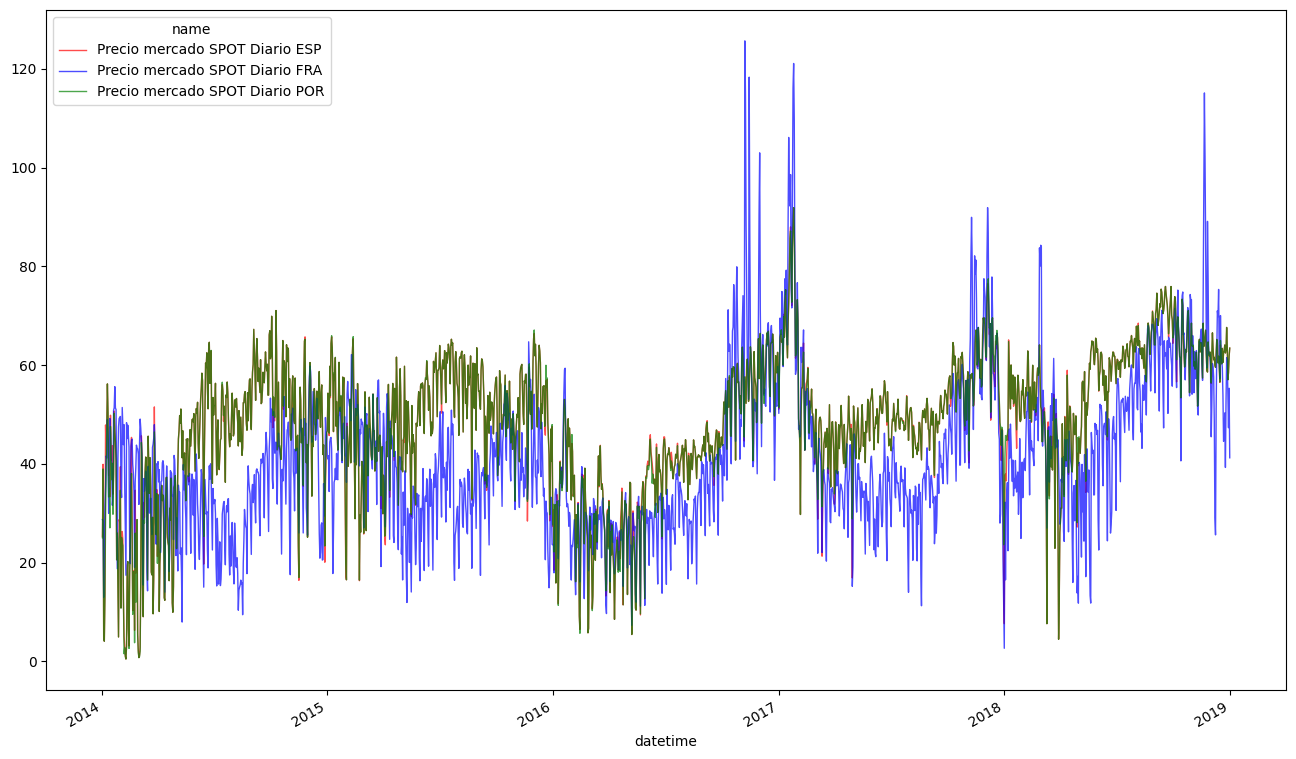

In [ ]:
# Comparo los precios de energia de los 3 paises en el tiempo

df_wide[['Precio mercado SPOT Diario ESP', 'Precio mercado SPOT Diario FRA', 'Precio mercado SPOT Diario POR']].plot(figsize=(16, 10),kind='line', alpha = 0.7, linewidth=1, color=['red', 'blue', 'green'])

Se observa claramente que la energia de Francia es comparativamente mas barata que la energia en Espanha y portugal.

Por otro lado, los precios de energia en Portugal y Espanha estan practicamente superpuestos, siguen el mismo patron y movimiento. Probablemente ambos sistemas electricos esten muy conectados.

A partir del anho 2017 paso algo que hizo, especialmente en Francia que el precio comenzara a ser menos regular y comenzo a tener picos muy altos.

### 5.1 Influye el clima en los precios de la Energia?

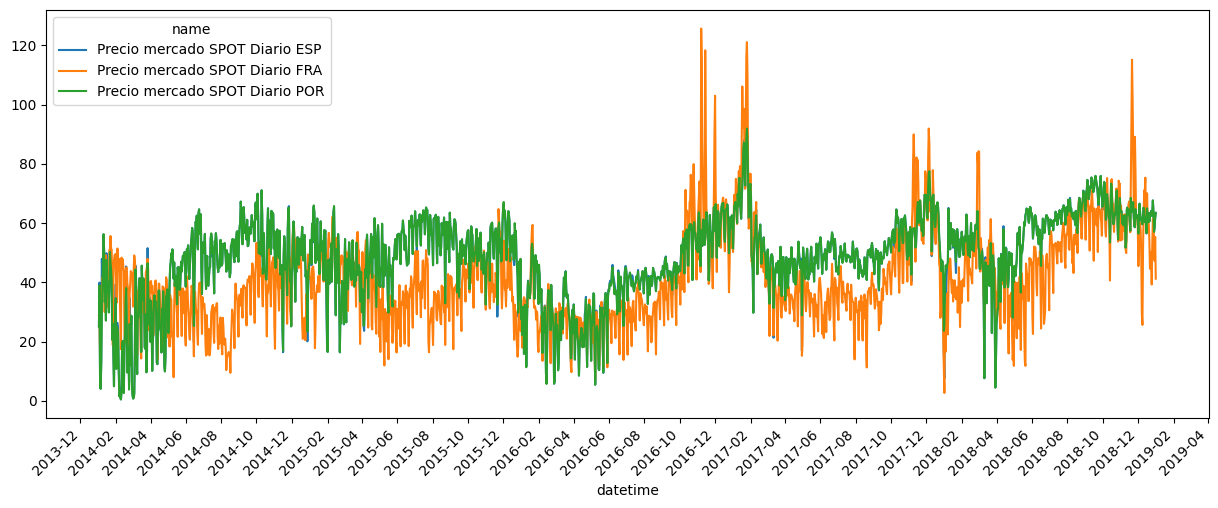

In [ ]:
#Agrego mas meses para poder diferenciar mejor
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(15, 6))
df_wide[['Precio mercado SPOT Diario ESP', 'Precio mercado SPOT Diario FRA', 'Precio mercado SPOT Diario POR']].plot(ax=ax)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # cada 3 meses
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # formato año-mes
plt.xticks(rotation=45)
plt.show()

Aparentemente el clima influye tambien en el costo. Se nota conssitentemente a traves de los anhos que el momento en el cual hay picos en los costos, corresponden con  los meses de invierno; Noviembre, Diciembre, Enero y Febrero.

###

####

### 5.2 Como es el historico de precios promedio a traves de los diferentes meses disponibles en el dataset?

####5.2.1 Primero Extraigo el anho mes del indice y creo una columna auxiliar.

In [ ]:
df_wide.index

DatetimeIndex(['2014-01-01 23:00:00', '2014-01-02 23:00:00',
               '2014-01-03 23:00:00', '2014-01-04 23:00:00',
               '2014-01-05 23:00:00', '2014-01-06 23:00:00',
               '2014-01-07 23:00:00', '2014-01-08 23:00:00',
               '2014-01-09 23:00:00', '2014-01-10 23:00:00',
               ...
               '2018-12-22 23:00:00', '2018-12-23 23:00:00',
               '2018-12-24 23:00:00', '2018-12-25 23:00:00',
               '2018-12-26 23:00:00', '2018-12-27 23:00:00',
               '2018-12-28 23:00:00', '2018-12-29 23:00:00',
               '2018-12-30 23:00:00', '2018-12-31 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=1826, freq=None)

In [ ]:
#Creo una nueva columna con los meses
df_wide['year-month'] = df_wide.index.to_period('M')
display(df_wide)

name,Demanda programada PBF total,Demanda real,Energía asignada en Mercado SPOT Diario España,Energía asignada en Mercado SPOT Diario Francia,Generación programada PBF Carbón,Generación programada PBF Ciclo combinado,Generación programada PBF Eólica,Generación programada PBF Gas Natural Cogeneración,Generación programada PBF Nuclear,Generación programada PBF Solar fotovoltaica,...,Generación programada PBF UGH + no UGH,Generación programada PBF total,Precio mercado SPOT Diario ESP,Precio mercado SPOT Diario FRA,Precio mercado SPOT Diario POR,Rentas de congestión mecanismos implícitos diario Francia exportación,Rentas de congestión mecanismos implícitos diario Francia importación,Rentas de congestión mecanismos implícitos diario Portugal exportación,Rentas de congestión mecanismos implícitos diario Portugal importación,year-month
datetime,,,,,,,,,,,,,,,,,,,,,
2014-01-01 23:00:00,620107.7,28191.597222,566081.9,171917.3,2498.7,4497.5,277443.9,75993.1,144654.6,7027.3,...,87564.8,642771.8,25.280833,28.711250,25.043750,NaN,NaN,NaN,10811.0,2014-01
2014-01-02 23:00:00,659865.2,28465.180556,586355.6,164386.5,19741.4,14541.1,237323.1,83437.4,146177.8,12817.8,...,94432.6,658078.5,39.924167,28.397500,38.980417,NaN,NaN,NaN,43035.0,2014-01
2014-01-03 23:00:00,632536.8,26860.493056,609612.9,166611.2,1288.0,3555.6,329506.6,65023.9,145055.3,12532.5,...,92236.2,680564.6,4.992083,12.997500,4.683750,NaN,NaN,NaN,14060.0,2014-01
2014-01-04 23:00:00,610251.7,25333.597222,605090.0,156271.4,NaN,2310.2,292138.3,64036.6,145200.2,14108.3,...,94189.3,644494.7,4.091667,23.085000,4.091667,NaN,NaN,0.0,0.0,2014-01
2014-01-05 23:00:00,572534.1,23905.541667,531020.2,170611.0,2687.0,6297.0,223942.0,74151.3,135624.0,14555.6,...,103851.1,598661.4,13.587500,31.290000,12.762500,NaN,NaN,NaN,37620.0,2014-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27 23:00:00,639571.2,28624.194444,490658.5,231141.3,68721.4,34335.1,120618.6,76964.0,145380.0,14287.2,...,88123.0,589771.5,63.785417,60.839167,63.785417,0.0,35740.70,0.0,0.0,2018-12
2018-12-28 23:00:00,602541.7,26632.840278,455438.4,204378.8,1776.0,424.0,188485.7,74152.7,145418.4,15096.0,...,75207.5,543353.5,57.048333,53.448333,57.048333,NaN,122948.00,0.0,0.0,2018-12
2018-12-29 23:00:00,574254.2,25255.055556,425522.8,203769.6,683.0,NaN,151707.2,72911.5,145392.0,18946.6,...,77932.7,510049.1,58.493750,47.331250,58.493750,NaN,189703.00,0.0,0.0,2018-12


Funciono, tengo una nueva columna con formato YEAR-MM.

<Axes: xlabel='name'>

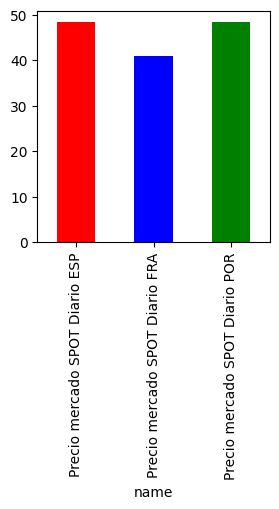

In [ ]:
df_wide[['Precio mercado SPOT Diario ESP', 'Precio mercado SPOT Diario FRA', 'Precio mercado SPOT Diario POR']].mean().plot(
    kind='bar',
    figsize=(3, 3),
    color=['red', 'blue', 'green'],
)

####

####5.2.2 Ahora agrupo mos YEAR-MM, las columnas de interes.

In [ ]:
#Agrupo con año-mes las columnas de interes
df_wide_grouped = df_wide.groupby('year-month')[['Precio mercado SPOT Diario ESP', 'Precio mercado SPOT Diario FRA', 'Precio mercado SPOT Diario POR']].mean()
df_wide_grouped.head()

name,Precio mercado SPOT Diario ESP,Precio mercado SPOT Diario FRA,Precio mercado SPOT Diario POR
year-month,,,
2014-01,33.782594,39.862366,31.634449
2014-02,16.808824,38.931190,15.065015
2014-03,27.279150,35.493531,26.783048
2014-04,26.697167,33.114250,26.657889
2014-05,42.718844,30.017030,42.780417


In [ ]:
df_wide_grouped.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 60 entries, 2014-01 to 2018-12
Freq: M
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Precio mercado SPOT Diario ESP  60 non-null     float64
 1   Precio mercado SPOT Diario FRA  60 non-null     float64
 2   Precio mercado SPOT Diario POR  60 non-null     float64
dtypes: float64(3)
memory usage: 1.9 KB


In [ ]:
df_wide_grouped.index

PeriodIndex(['2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
             '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
             '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
             '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
             '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
             '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
             '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
             '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
             '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', name='year-month')

Funciono, tengo un nuevo dataFrame con los valores que deseo. Tiene 60 filas que justo corresponde con 5 anhos en meses.

###

####5.2.3 Se analizan los resultados para ver los patrones que siguen.  

<Axes: xlabel='year-month'>

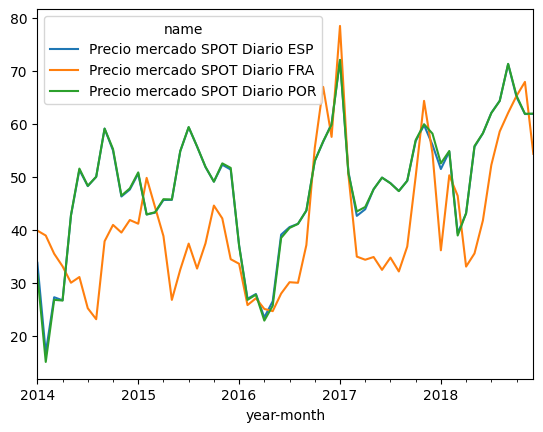

In [ ]:
#Hago un grafico generico primero para ver las tendencias
df_wide_grouped.plot()

Se ven claramente las tendencias por temporada y mensualizadamente practicamente las lineas de precio de Portugal y Espanha se solapan.

####5.2.3.1 Hago unas columnas adicionales con los rankings por pais por mes.  

In [ ]:
df_wide_grouped.iloc[0]

,2014-01
name,
Precio mercado SPOT Diario ESP,33.782594
Precio mercado SPOT Diario FRA,39.862366
Precio mercado SPOT Diario POR,31.634449


In [ ]:
df_wide_grouped.iloc[0].idxmax()

'Precio mercado SPOT Diario FRA'

In [ ]:
df_wide_grouped.idxmax(axis=1)

,0
year-month,
2014-01,Precio mercado SPOT Diario FRA
2014-02,Precio mercado SPOT Diario FRA
2014-03,Precio mercado SPOT Diario FRA
2014-04,Precio mercado SPOT Diario FRA
2014-05,Precio mercado SPOT Diario POR
2014-06,Precio mercado SPOT Diario POR
2014-07,Precio mercado SPOT Diario POR
2014-08,Precio mercado SPOT Diario POR
2014-09,Precio mercado SPOT Diario POR


In [ ]:
#DIccionario de Abreviaturas
ABREVIADOS = {'Precio mercado SPOT Diario ESP': 'ESP',
              'Precio mercado SPOT Diario FRA': 'FRA',
              'Precio mercado SPOT Diario POR': 'POR'}

In [ ]:
#FUNCION AUXILIAR PARA ASIGNAR ABREVIATURA
def abreviar_nombre(nombre):
  return ABREVIADOS[nombre]


In [ ]:
#Creo la nueva columna Precio Alto
df_wide_grouped['Precio Alto'] = df_wide_grouped.idxmax(axis=1).map(abreviar_nombre)


In [ ]:
#Lista de Columnas
lista_columnas_paises = ['Precio mercado SPOT Diario ESP', 'Precio mercado SPOT Diario FRA', 'Precio mercado SPOT Diario POR']

In [ ]:
#Creo la columna para precio bajo
df_wide_grouped['Precio Bajo'] = df_wide_grouped[lista_columnas_paises].idxmin(axis=1).map(arg=abreviar_nombre)

In [ ]:
df_wide_grouped.head()

name,Precio mercado SPOT Diario ESP,Precio mercado SPOT Diario FRA,Precio mercado SPOT Diario POR,Precio Alto,Precio Bajo
year-month,,,,,
2014-01,33.782594,39.862366,31.634449,FRA,POR
2014-02,16.808824,38.931190,15.065015,FRA,POR
2014-03,27.279150,35.493531,26.783048,FRA,POR
2014-04,26.697167,33.114250,26.657889,FRA,POR
2014-05,42.718844,30.017030,42.780417,POR,FRA


Ya tengo las columnas creadas ahora podre hacer concusiones mas faciles de manera mensualizada.

####5.2.4 Veamos los resultados por costo de energia por mes.

In [ ]:
#Lista por ranking
lista_ranking = ['Precio Bajo', 'Precio Alto']

In [ ]:
df_wide_grouped['Precio Bajo'].value_counts()

,count
Precio Bajo,
FRA,46
POR,7
ESP,7


Consistentemente Francia Tiene el mayor numero de meses con precios bajos.

<Axes: ylabel='count'>

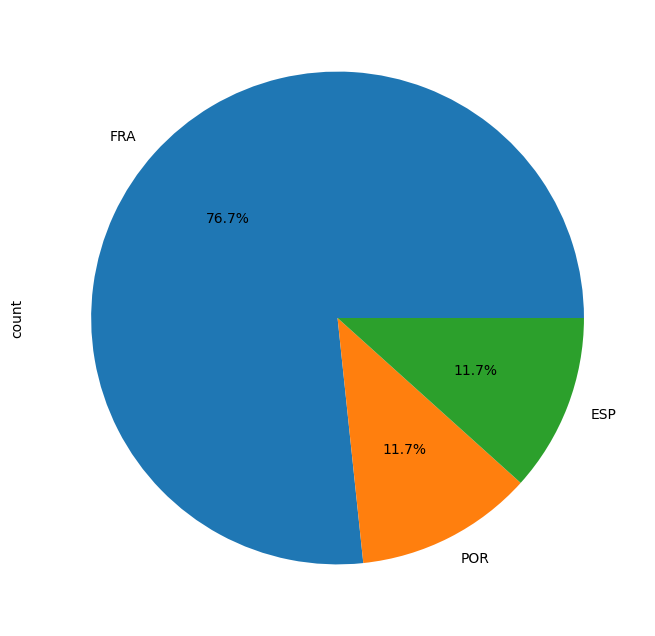

In [ ]:
df_wide_grouped['Precio Bajo'].value_counts().plot(
    kind='pie',
    figsize=(10, 8),
    autopct='%1.1f%%'
)

Si, efectivamnete de manera mensual es mucho mas grande la diferencia entre paises.

#### 5.2.4.1 Y que pais no conviene por tener siempre los precios mas altos?

In [ ]:
#Precios mas altos
df_wide_grouped['Precio Alto'].value_counts()

,count
Precio Alto,
POR,32
ESP,15
FRA,13


<Axes: ylabel='count'>

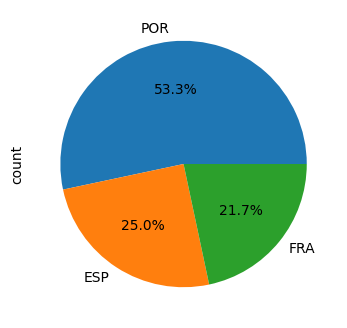

In [ ]:
#Precios mas Altos
df_wide_grouped['Precio Alto'].value_counts().plot(
    kind='pie',
    figsize=(6, 4),
    autopct='%1.1f%%'
)

Sorprendentemente Portugal es el pais con mas meses con el costo mas elevado de la Energia, en este caso mas del 50% de los meses.

###

## 6. Estrategias

La decision en realidad dependera mucho del caso puntual del datacenter. Y de los plazos que se planteen para hacer estos analisis.



###6.1 Estrategia a Largo Plazo (ANUAL)

Para la mayoria de los casos asumo que es un lugar fisico que tendra que verse a largo plazo, es decir a partir de los anhos. Asumiendo que el consumo es constante todos los dias a traves del tiempo.

In [ ]:
#Creo un nuevo DataFrame anualizado
anhos = df_wide.index.to_period('Y')


In [ ]:
anhos

PeriodIndex(['2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014',
             '2014', '2014',
             ...
             '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018',
             '2018', '2018'],
            dtype='period[Y-DEC]', name='datetime', length=1826)

In [ ]:
#Creo el dataframe

df_wide_anual = df_wide.groupby(anhos)[['Precio mercado SPOT Diario ESP', 'Precio mercado SPOT Diario FRA', 'Precio mercado SPOT Diario POR']].mean()

In [ ]:
#Compruebo
df_wide_anual

name,Precio mercado SPOT Diario ESP,Precio mercado SPOT Diario FRA,Precio mercado SPOT Diario POR
datetime,,,
2014,42.241806,34.706219,41.966327
2015,50.270251,38.425926,50.374245
2016,39.727881,36.818189,39.498319
2017,52.118903,44.833587,52.407667
2018,57.445582,50.302974,57.552538


<Axes: xlabel='datetime'>

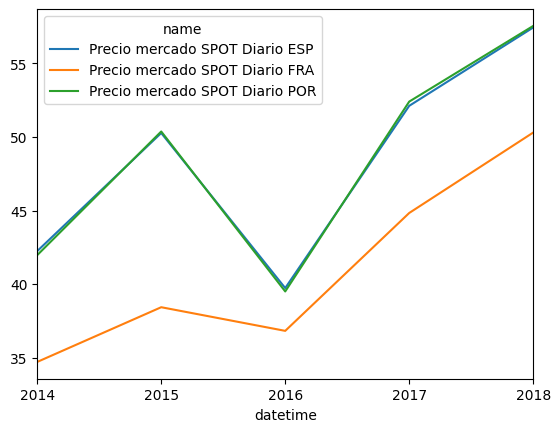

In [ ]:
df_wide_anual.plot()

Se observa claramente como el precio promedio de la energia de Francia Esta por debajo de los otros dos paises en todos los anhos del DataSet.

####6.1.2 Que diferencias porcentuales representaria la eleccion correcta de un pais en los anhos de estudio.



In [ ]:
#Calculo el valor minimo y maximo en cada caso

df_wide_anual['Precio Alto'] = df_wide_anual.max(axis=1)
df_wide_anual['Precio Bajo'] = df_wide_anual.min(axis=1)

In [ ]:
#Procentaje, es la diferencia entre valor minimo y maximo.
df_wide_anual['% Diferencia'] = round(number=(abs((df_wide_anual['Precio Bajo'] / df_wide_anual['Precio Alto']) - 1))*100, ndigits=2)

In [ ]:
df_wide_anual

name,Precio mercado SPOT Diario ESP,Precio mercado SPOT Diario FRA,Precio mercado SPOT Diario POR,Precio Alto,Precio Bajo,% Diferencia
datetime,,,,,,
2014,42.241806,34.706219,41.966327,42.241806,34.706219,17.84
2015,50.270251,38.425926,50.374245,50.374245,38.425926,23.72
2016,39.727881,36.818189,39.498319,39.727881,36.818189,7.32
2017,52.118903,44.833587,52.407667,52.407667,44.833587,14.45
2018,57.445582,50.302974,57.552538,57.552538,50.302974,12.60


Entonces haber elegido el pais correcto hace una gran diferencia en lo respectivo al costo por energia.

###

###6.2 Estrategia a corto plazo (MENSUAL)

Que pasaria si en vez de tener un DataCenter en realidad tuviera una unidad de Criptomineria portatil que puedo conectar y desconectar convenietemente desde un lugar u otro?

En ese caso probablemente podria optar por una estrategia mensual y siempre consumir energia del pais con el menor costo mensual.


### 6.2.1 Donde es mas conveniente mudarse?

No se puede simplemente asumir que hay que evitar el pais con la cantidad de meses mas costosos (POR). Porque en realidad si (FRA) es nuestra mejor opcion, lo que se debe determinar cual es el mejor lugar para ir cuando la energia en (FRA) es mas costosa.

In [ ]:
df_wide_grouped[df_wide_grouped['Precio Bajo'] != 'FRA']

name,Precio mercado SPOT Diario ESP,Precio mercado SPOT Diario FRA,Precio mercado SPOT Diario POR,Precio Alto,Precio Bajo
year-month,,,,,
2014-01,33.782594,39.862366,31.634449,FRA,POR
2014-02,16.808824,38.931190,15.065015,FRA,POR
2014-03,27.279150,35.493531,26.783048,FRA,POR
2014-04,26.697167,33.114250,26.657889,FRA,POR
2015-02,42.898973,49.816696,42.909196,FRA,ESP
2015-03,43.244970,44.298495,43.330194,FRA,ESP
2016-04,23.475069,25.069431,22.866403,FRA,POR
2016-10,53.028334,55.458424,52.981748,FRA,POR
2016-11,56.615125,66.989653,56.724708,FRA,ESP


Se confirma que la solucion no era simplemente evitar en teoria el pais con mas meses caros (POR), debido a que en ciertos anhos el pais mas caro ha terminado siendo el pais mas barato cuando la energia en (FRA) es costosa. Entonces nos podriamos haber mudado de esta manera con nuestro equipo siempre buscando inteligentemente los precios de la energia mas baratos:



*   Enero 2014 - Abril 2014 PORTUGAL

*   Febrero 2015 - Marzo 2015 ESPANHA
*   Octubre 2016 - Enero 2017 ESPANHA


*   Octubre 2018 - Noviembre 2018 ESPANHA





## 7. COSTOS

Hasta ahora hemos determinado donde seria mas conveniente vivir anualmente o inclusive tenemos periodos determinados para mudar conveninetemente por temporadas.

Como esto realmente impacta en los costos?

Existe un equipo de Criptomineria que se llama "ASIC S19 Pro".

Consumo por dia: 78 kW.

Convertimos a mWH porque es la unidad que tiene el DF
####CONSUMO =  0.078 MWh por dia


In [ ]:
#GLOBAL
CONSUMO = 0.078

###

###7.1 Nuevo DF con costos de energia de acuerdo a mi consumo.

Aprovechando que en el DF original tengo los valores diarios del precio de la energia creo un nuevo DF que contenga los costos para mi.

In [ ]:
#Creo el nuevo DF
df_cost = df_wide[['Precio mercado SPOT Diario ESP', 'Precio mercado SPOT Diario FRA', 'Precio mercado SPOT Diario POR']].copy()
df_cost.head()

name,Precio mercado SPOT Diario ESP,Precio mercado SPOT Diario FRA,Precio mercado SPOT Diario POR
datetime,,,
2014-01-01 23:00:00,25.280833,28.71125,25.043750
2014-01-02 23:00:00,39.924167,28.39750,38.980417
2014-01-03 23:00:00,4.992083,12.99750,4.683750
2014-01-04 23:00:00,4.091667,23.08500,4.091667
2014-01-05 23:00:00,13.587500,31.29000,12.762500


In [ ]:
#Creo las nuevas columnas con los costos diarios
df_cost['ESP'] = df_cost['Precio mercado SPOT Diario ESP'] * CONSUMO
df_cost['POR'] = df_cost['Precio mercado SPOT Diario POR'] * CONSUMO
df_cost['FRA'] = df_cost['Precio mercado SPOT Diario FRA'] * CONSUMO

In [ ]:
#Verifico
df_cost.head()

name,Precio mercado SPOT Diario ESP,Precio mercado SPOT Diario FRA,Precio mercado SPOT Diario POR,ESP,POR,FRA
datetime,,,,,,
2014-01-01 23:00:00,25.280833,28.71125,25.043750,1.971905,1.953412,2.239478
2014-01-02 23:00:00,39.924167,28.39750,38.980417,3.114085,3.040472,2.215005
2014-01-03 23:00:00,4.992083,12.99750,4.683750,0.389383,0.365333,1.013805
2014-01-04 23:00:00,4.091667,23.08500,4.091667,0.319150,0.319150,1.800630
2014-01-05 23:00:00,13.587500,31.29000,12.762500,1.059825,0.995475,2.440620


###

###7.2 Agrego ahora la decision anual (FRA)

Para hacerlo mas notorio y ver en realidad la diferencia calculare tambien la peor opcion vista anteriormente. Que en el promedio general figura como que ESP es la que tiene el peor promedio en los 5 años de estudio.


In [ ]:
#Agrego las nuevas columnas
df_cost['FRA_acumulado'] = df_cost['FRA'].cumsum()
df_cost['ESP_acumulado'] = df_cost['ESP'].cumsum()

In [ ]:
#Verifico
df_cost.head()

name,Precio mercado SPOT Diario ESP,Precio mercado SPOT Diario FRA,Precio mercado SPOT Diario POR,ESP,POR,FRA,FRA_acumulado,ESP_acumulado
datetime,,,,,,,,
2014-01-01 23:00:00,25.280833,28.71125,25.043750,1.971905,1.953412,2.239478,2.239478,1.971905
2014-01-02 23:00:00,39.924167,28.39750,38.980417,3.114085,3.040472,2.215005,4.454483,5.085990
2014-01-03 23:00:00,4.992083,12.99750,4.683750,0.389383,0.365333,1.013805,5.468288,5.475372
2014-01-04 23:00:00,4.091667,23.08500,4.091667,0.319150,0.319150,1.800630,7.268918,5.794522
2014-01-05 23:00:00,13.587500,31.29000,12.762500,1.059825,0.995475,2.440620,9.709537,6.854347


Funciono, ahora tengo dos columnas con el consumo acumulado por FRA y ESP.

####Se observan pequenhas diferencias de menos de 1 EURO por dia.

<Axes: xlabel='datetime'>

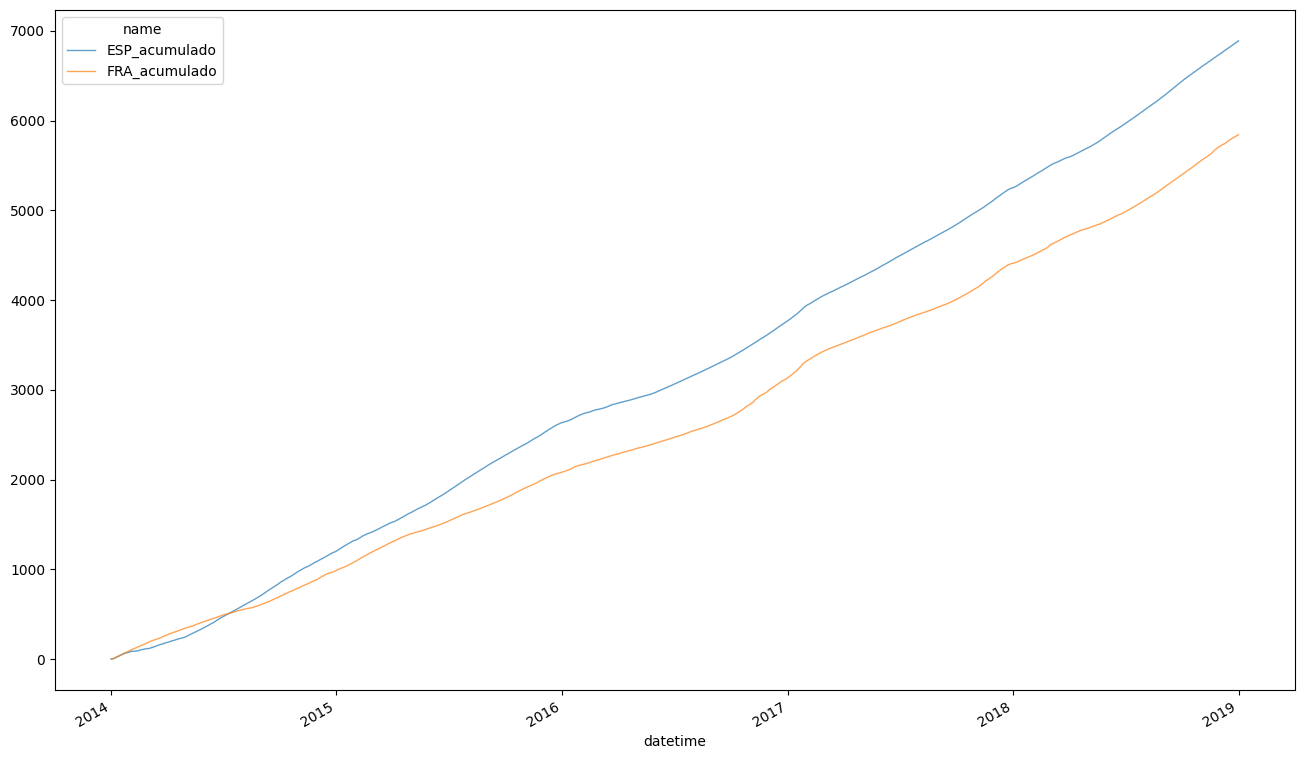

In [ ]:
df_cost[['ESP_acumulado', 'FRA_acumulado']].plot(
    kind='line',
    figsize=(16, 10),
    alpha = 0.7,
    linewidth=1,
)

Aqui se observa la diferencia economica entre haber elegido Francia o Espanha para montar nuestro equipo de criptomineria en 5 anhos.

Se observa claramente como va aumentando la diferencia de Costo entre ambas con el pasar de los anhos.

In [ ]:
#Diferencia en Monto
cost_acum_dif = df_cost['ESP_acumulado'].iloc[-1] - df_cost['FRA_acumulado'].iloc[-1]
print(f'La diferencia de costo entre ambas opciones es de {cost_acum_dif} Euros en 5 anhos')


La diferencia de costo entre ambas opciones es de 1045.5749619391236 Euros en 5 anhos


Es un monto considerable tomando en cuenta que es un solo equipo pequenho y que la diferencia vista un un dia cualquiera parece insignificante (menos de 1 EURO)

###

###7.2 Estrategia Mensualizada

Suponiendo que podamos ir cada mes al pais que tenga el menor costo energetico, dejando de lado los problemas logisticos que eso tendria.

#### como afectaria eso en el costo?


In [ ]:
#agrego al DF actual una columna year-month
df_cost['year-month'] = df_cost.index.to_period('M')

#Verifico
df_cost.head()

name,Precio mercado SPOT Diario ESP,Precio mercado SPOT Diario FRA,Precio mercado SPOT Diario POR,ESP,POR,FRA,FRA_acumulado,ESP_acumulado,year-month
datetime,,,,,,,,,
2014-01-01 23:00:00,25.280833,28.71125,25.043750,1.971905,1.953412,2.239478,2.239478,1.971905,2014-01
2014-01-02 23:00:00,39.924167,28.39750,38.980417,3.114085,3.040472,2.215005,4.454483,5.085990,2014-01
2014-01-03 23:00:00,4.992083,12.99750,4.683750,0.389383,0.365333,1.013805,5.468288,5.475372,2014-01
2014-01-04 23:00:00,4.091667,23.08500,4.091667,0.319150,0.319150,1.800630,7.268918,5.794522,2014-01
2014-01-05 23:00:00,13.587500,31.29000,12.762500,1.059825,0.995475,2.440620,9.709537,6.854347,2014-01


In [ ]:
#Creo un mapeo del pais mas barato en cada mes, aprovecho que ya tengo eso en df_wide_grouped
barato_por_mes_dict = df_wide_grouped['Precio Bajo'].to_dict()

In [ ]:
barato_por_mes_dict

{Period('2014-01', 'M'): 'POR',
 Period('2014-02', 'M'): 'POR',
 Period('2014-03', 'M'): 'POR',
 Period('2014-04', 'M'): 'POR',
 Period('2014-05', 'M'): 'FRA',
 Period('2014-06', 'M'): 'FRA',
 Period('2014-07', 'M'): 'FRA',
 Period('2014-08', 'M'): 'FRA',
 Period('2014-09', 'M'): 'FRA',
 Period('2014-10', 'M'): 'FRA',
 Period('2014-11', 'M'): 'FRA',
 Period('2014-12', 'M'): 'FRA',
 Period('2015-01', 'M'): 'FRA',
 Period('2015-02', 'M'): 'ESP',
 Period('2015-03', 'M'): 'ESP',
 Period('2015-04', 'M'): 'FRA',
 Period('2015-05', 'M'): 'FRA',
 Period('2015-06', 'M'): 'FRA',
 Period('2015-07', 'M'): 'FRA',
 Period('2015-08', 'M'): 'FRA',
 Period('2015-09', 'M'): 'FRA',
 Period('2015-10', 'M'): 'FRA',
 Period('2015-11', 'M'): 'FRA',
 Period('2015-12', 'M'): 'FRA',
 Period('2016-01', 'M'): 'FRA',
 Period('2016-02', 'M'): 'FRA',
 Period('2016-03', 'M'): 'FRA',
 Period('2016-04', 'M'): 'POR',
 Period('2016-05', 'M'): 'FRA',
 Period('2016-06', 'M'): 'FRA',
 Period('2016-07', 'M'): 'FRA',
 Period(

In [ ]:
#AGrego la columna donde esta el mapeo
df_cost['PrecioBajo'] = df_cost['year-month'].map(barato_por_mes_dict)

#Verifico
df_cost[['year-month', 'PrecioBajo']].head()

name,year-month,PrecioBajo
datetime,,
2014-01-01 23:00:00,2014-01,POR
2014-01-02 23:00:00,2014-01,POR
2014-01-03 23:00:00,2014-01,POR
2014-01-04 23:00:00,2014-01,POR
2014-01-05 23:00:00,2014-01,POR


In [ ]:
#Agrego ahora la columna de costo por dia pero tomando en cuenta el pais mas barato ese mes

df_cost['optimo_por_mes'] = df_cost.apply(
    lambda row: row[row['PrecioBajo']],
    axis=1)

In [ ]:
#verifico
df_cost[['year-month', 'PrecioBajo', 'optimo_por_mes']].head()

name,year-month,PrecioBajo,optimo_por_mes
datetime,,,
2014-01-01 23:00:00,2014-01,POR,1.953412
2014-01-02 23:00:00,2014-01,POR,3.040472
2014-01-03 23:00:00,2014-01,POR,0.365333
2014-01-04 23:00:00,2014-01,POR,0.319150
2014-01-05 23:00:00,2014-01,POR,0.995475


In [ ]:
#Con el optimo por mes ahora hago el acumulado
df_cost['var_acumulado'] = df_cost['optimo_por_mes'].cumsum()

#Verifico
df_cost.head()

name,Precio mercado SPOT Diario ESP,Precio mercado SPOT Diario FRA,Precio mercado SPOT Diario POR,ESP,POR,FRA,FRA_acumulado,ESP_acumulado,year-month,PrecioBajo,optimo_por_mes,var_acumulado
datetime,,,,,,,,,,,,
2014-01-01 23:00:00,25.280833,28.71125,25.043750,1.971905,1.953412,2.239478,2.239478,1.971905,2014-01,POR,1.953412,1.953412
2014-01-02 23:00:00,39.924167,28.39750,38.980417,3.114085,3.040472,2.215005,4.454483,5.085990,2014-01,POR,3.040472,4.993885
2014-01-03 23:00:00,4.992083,12.99750,4.683750,0.389383,0.365333,1.013805,5.468288,5.475372,2014-01,POR,0.365333,5.359217
2014-01-04 23:00:00,4.091667,23.08500,4.091667,0.319150,0.319150,1.800630,7.268918,5.794522,2014-01,POR,0.319150,5.678367
2014-01-05 23:00:00,13.587500,31.29000,12.762500,1.059825,0.995475,2.440620,9.709537,6.854347,2014-01,POR,0.995475,6.673842


<Axes: xlabel='datetime'>

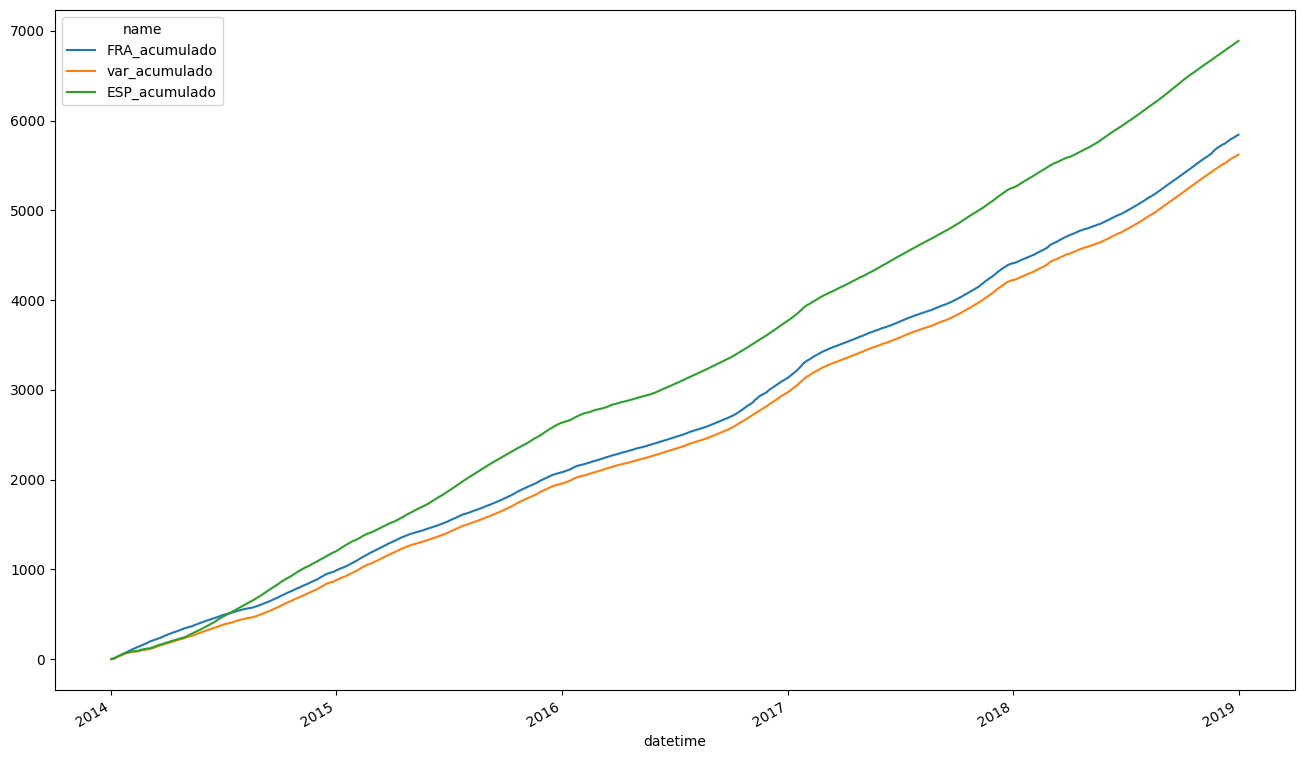

In [ ]:
#Comparo
df_cost[['FRA_acumulado', 'var_acumulado', 'ESP_acumulado']].plot(
    kind='line',
    figsize=(16, 10))

Efectivamente la estrategia de mudarse todos los meses al pais con la energia mas barata parece ser la opcion mas economica.


Sien embargo. no parece haber una gran diferencia en hacer mudanzas continuas buscando el mejor precio, a simple vista no parece rentable y no se aprecia una diferencia muy marcada entre elegir un pais con buenos precios de Energia.



In [ ]:
#En numeros
diferecnia_de_costos_anual_vs_mensual = df_cost['FRA_acumulado'].iloc[-1] - df_cost['var_acumulado'].iloc[-1]

print(f'La diferecnia de costos entre elegir un pais o mudarse convenientemente por mes de acuerdo a los precios de la energia es {round(number=diferecnia_de_costos_anual_vs_mensual, ndigits=2)} EUROS')

La diferecnia de costos entre elegir un pais o mudarse convenientemente por mes de acuerdo a los precios de la energia es 220.4 EUROS


####Simplemente no vale la pena mudarse cada mes, la diferencia no es tan significativa como la diferencia entre la enegia del pais mas caro y la del pais mas barato.

